#### Load the neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the dataset

In [2]:
df = pd.read_csv('D:/Academic/CS/EDA_Assignment/data/raw/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


* hypertension - high blood pressure
* target column - stroke (1) or no stroke (0)

#### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Missing Value Treatment

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


##### Observations
* there are missing values only in the bmi column. no other column caintaining missing values
* bmi value depend on the weight and height of the person, in this dataset we don't have weight and height columns, so we cannot generate the missing values based on that
* i gonna impute bmi missing values with the mode of the bmi column, because the mean value can contain outliers ==> but mode impute mostly done for the categorical columns

##### Precentage of missing value

In [6]:
missing_count = df['bmi'].isna().sum()
total_count = len(df)
missing_percentage = (missing_count / total_count) * 100
print(f"Percentage of missing values in 'bmi' column: {missing_percentage:.2f}%")

Percentage of missing values in 'bmi' column: 3.93%


##### Rule of thumb when dealing with missing values:

* <5%: Generally safe to use any method
* 5-15%: Consider imputation carefully
* 15-30%: Deletion may be risky, advanced imputation needed
* >30%: Consider dropping the variable entirely

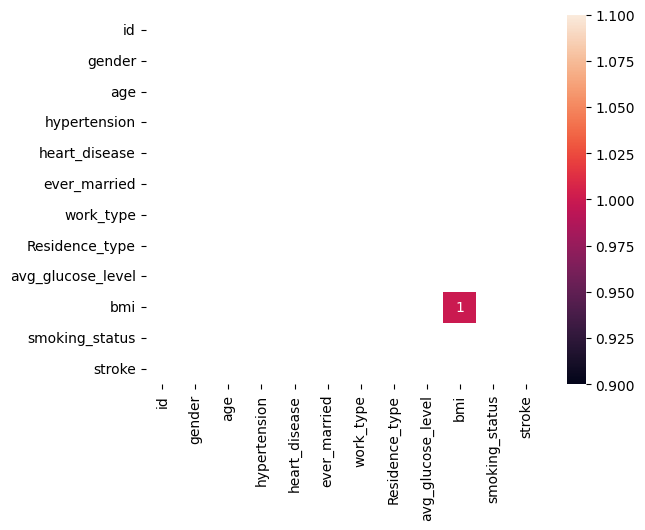

In [8]:
# Create missing value indicators
missing_df = df.isnull()

# Correlation matrix of missing patterns
corr_missing = missing_df.corr()
sns.heatmap(corr_missing, annot=True)
plt.show()

* no point of doing this becuase there is only one column with missing values

* Even though there are methods for checking to identify the missing data mechanism like MCAR, MAR, MNAR I'm not going to do that.
* because I think bmi values is MCAR (Missing Completely at Random) because there is no clear pattern or reason for the missing values in the bmi column based on the other variables in the dataset.

* i can imputer missing values with the help of age column because age is related to bmi, as people age their metabolism slows down which can lead to weight gain and changes in body composition, affecting bmi.

##### Let's draw co-relation matrix

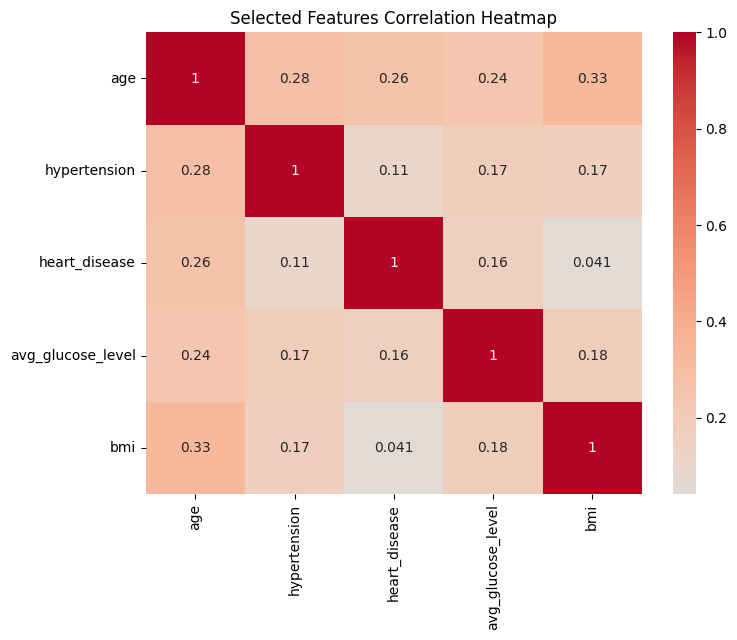

In [12]:
# choose only the columns you want
cols = ["age", "hypertension", "heart_disease", "avg_glucose_level","bmi"]

corr = df[cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Selected Features Correlation Heatmap")
plt.show()

* this shows us there is some relation between age and bmi

##### Male and Female count

In [17]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

* since other count is only 1 we can delete that row    

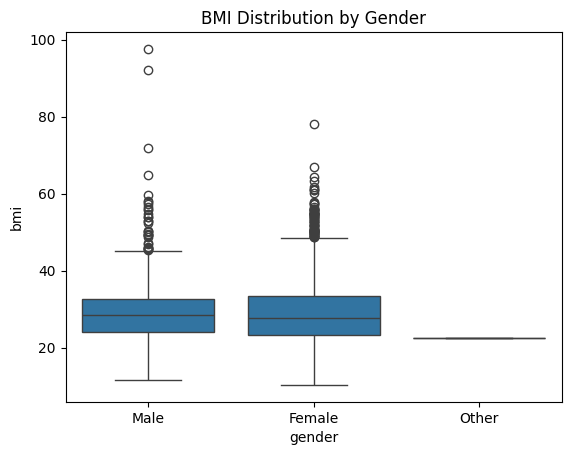

In [13]:
sns.boxplot(x="gender", y="bmi", data=df)
plt.title("BMI Distribution by Gender")
plt.show()

In [14]:
from scipy import stats

male_bmi = df[df["gender"]=="Male"]["bmi"].dropna()
female_bmi = df[df["gender"]=="Female"]["bmi"].dropna()

t_stat, p_val = stats.ttest_ind(male_bmi, female_bmi)
print("t-stat:", t_stat, "p-value:", p_val)

t-stat: -1.8332195010592032 p-value: 0.06683049272383709


In [11]:
age_max = df['age'].max()
age_min = df['age'].min()
print(f"Age range: {age_min} - {age_max}")

Age range: 0.08 - 82.0


=======================================================================================

* advanced technique - we can use KNN imputer to impute the missing values (Later)

##### Take distribution of bmi column

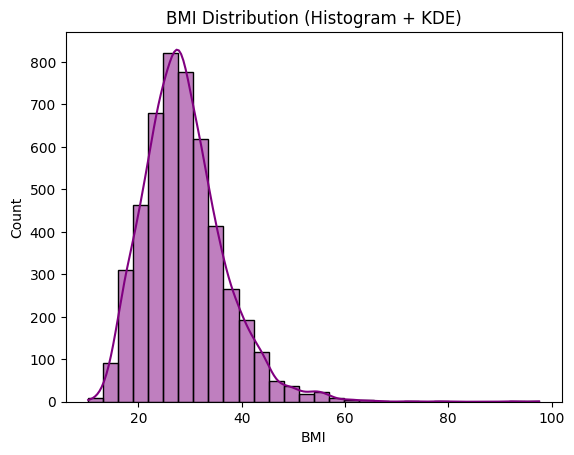

In [14]:
sns.histplot(df, x='bmi', bins=30, color='purple', kde=True, edgecolor='black')

plt.title("BMI Distribution (Histogram + KDE)")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

* we can conclude that the distribution is right skewed.
* since the mean is pulled upward by the skew and outliers, so it will likely overestimate typical BMI values.
* therefore, the median is a more robust measure of central tendency for this right-skewed distribution, as it is less affected by extreme values and provides a better representation of the typical BMI in this dataset.

#### Outlier Detection and Treatment

In [15]:
num_columns = ['age', 'avg_glucose_level', 'bmi']

* we have two methods to detect outliers
  1. IQR
  2. Z-score
* first i need to check what are the distribution of this numerical colums

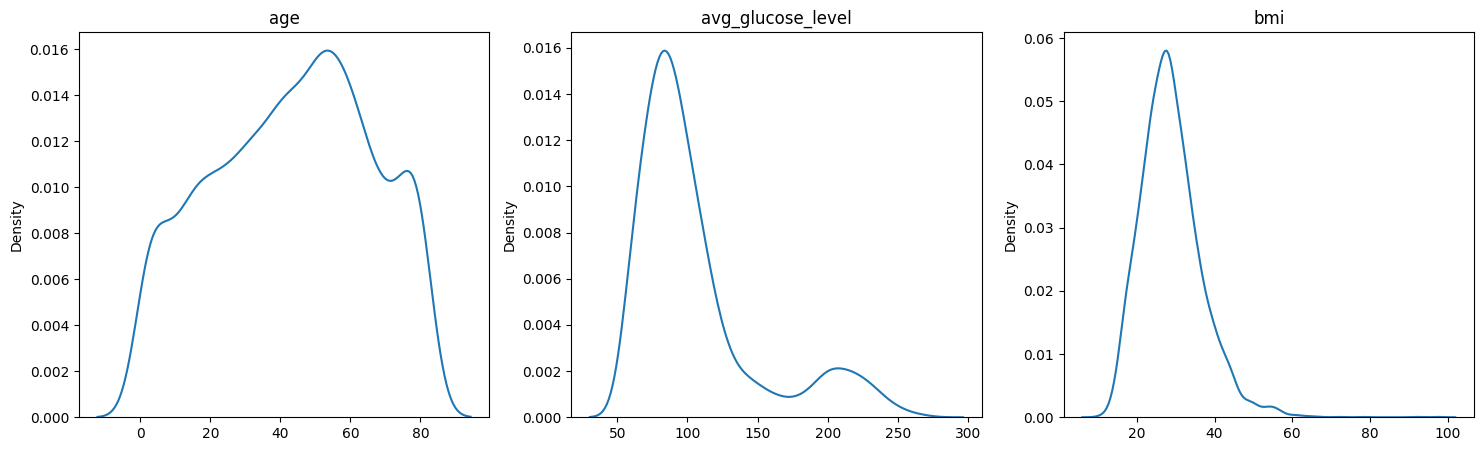

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()
for i, col in enumerate(num_columns):
    sns.kdeplot(df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

plt.show()

* here age looks like normal distribution, but avg_glucose_level and bmi looks like right skewed distribution
* so i can use z-score method for age column and IQR method for avg_glucose_level and bmi columns
* but for simplicity i gonna use IQR method for all numerical columns

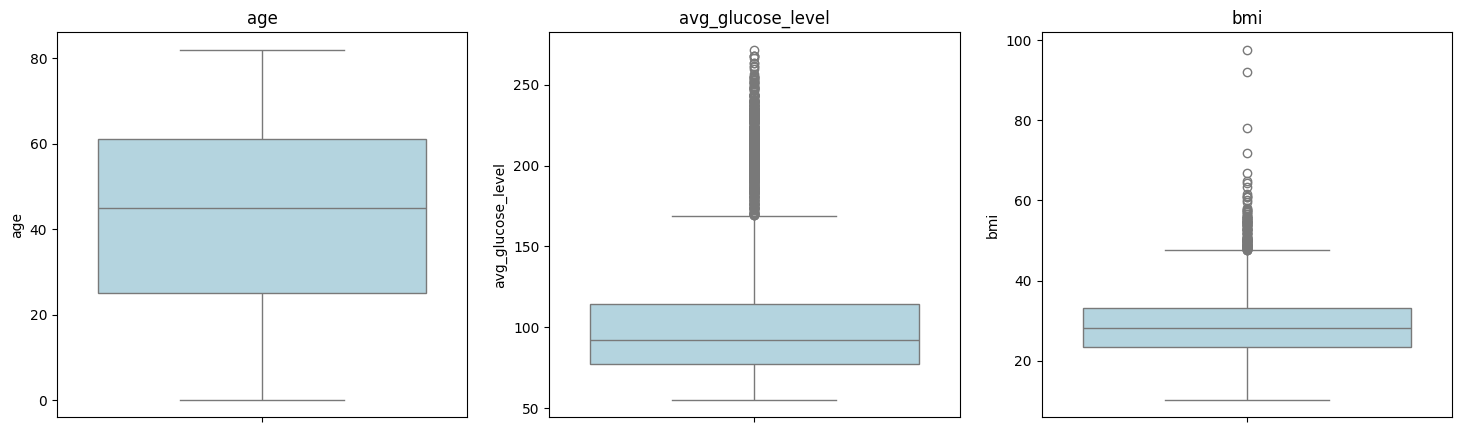

In [22]:
# this boxplot method internely use IQR method to detect outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(num_columns):
    sns.boxplot(y=df[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f'{col}')

* look like age column has no outliers but avg_glucose_level and bmi columns have outliers
* next we take the outliers count and precentage of each numerical columns

In [25]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [26]:
for col in num_columns:
    outliers = detect_outliers_iqr(df, col)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    print(f"{col} - Outliers: {outlier_count}, Percentage: {outlier_percentage:.2f}%")

age - Outliers: 0, Percentage: 0.00%
avg_glucose_level - Outliers: 627, Percentage: 12.27%
bmi - Outliers: 110, Percentage: 2.15%


* i can't blindly delete these outliers before do anything i need to identify the context
* before apply any outlier treatment method i need to check whther these outliers are biologically possible or not

In [29]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

average glucose level ranges like this
* Normal: 70 to 99
* Prediabetes: 100 to 125
* Diabetes: 126 or higher
* Higher levels : Levels above 140 can be also exist due to the various condition

In [30]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

usualy bmi value range like this
* Below 18.5 - Underweight
* 18.5 to 24.9 - Normal weight
* 25 to 29.9 - Overweight
* 30 or higher - Obesity


* since this outliers are biologically possible(in extreme cases) we cannot delete them. so i decided to treat these outliers with capping method

#### Encoding Categorical Columns

In [ ]:
cat_columns = ['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [31]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

* since gender is nominal categorical column we can use one hot encoding method

In [32]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

* we can use binary mapping here because ever_married column contains only two categories

In [33]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

* one hot encodign for work_type column

In [34]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

* one hot encodign is suitable

In [35]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

* just use binary mapping for Residence_type column

Rule of Thumb

* Binary categorical (2 categories) → ✅ Use mapping (0/1).

* Nominal categorical (>2 categories, no order) → ✅ Use One-Hot Encoding.

* Ordinal categorical (ordered categories) → ✅ Use Ordinal Encoding.

#### Normalization/Standardization

In [36]:
nor_columns = ['age', 'avg_glucose_level', 'bmi']

* since avg_glucose_level and bmi columns are right skewed distribution we can use standardization method for these two columns
* age column okay for both normalization and standardization

=============================================================================================================================

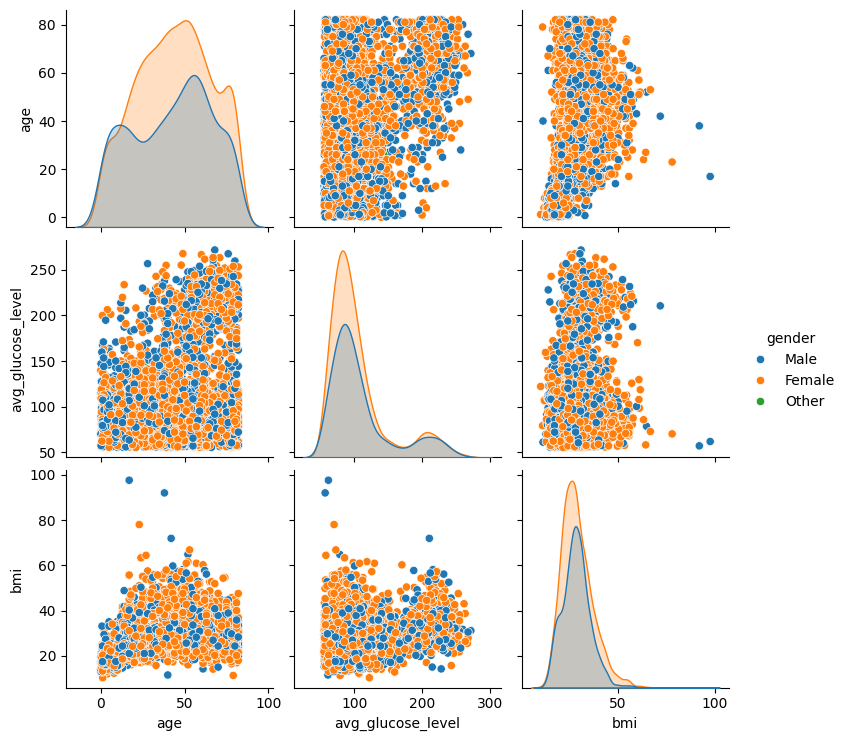

In [38]:
sns.pairplot(df, vars=['age', 'avg_glucose_level', 'bmi'], hue='gender')